Images shape: (1797, 8, 8)
Data shape: (1797, 64)
Target shape: (1797,)
Manual flattened shape: (1797, 64)
Does manual flattening match digits.data? True


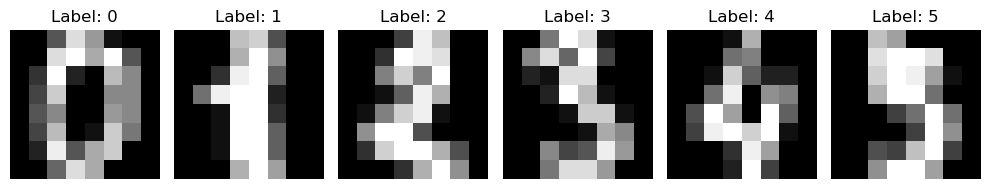

Train shape: (1437, 64)
Test shape: (360, 64)

Scaling is important because it helps gradient-based optimizers (like in logistic regression) converge faster and prevents features with large ranges from dominating the model.

Training Accuracy: 0.9903
Testing Accuracy: 0.9667

Predicted Probabilities: [[0.    0.    0.    0.    0.    0.    0.998 0.    0.001 0.001]]
Predicted Class: 6
True Label: 6


C:\Users\kanav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


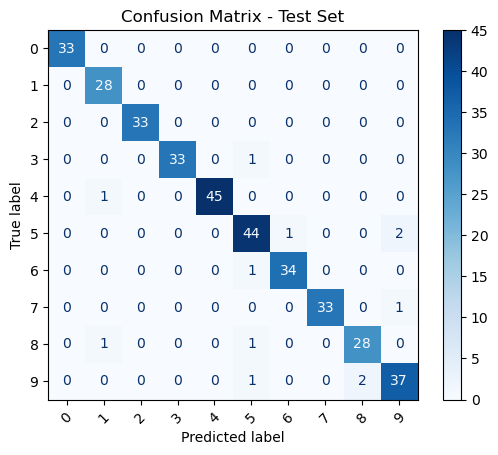


Top 3 Most Confused Digit Pairs (true → predicted):
5 → 9 (2 times)
9 → 8 (2 times)
8 → 1 (1 times)


C:\Users\kanav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\kanav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\kanav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\kanav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_clas

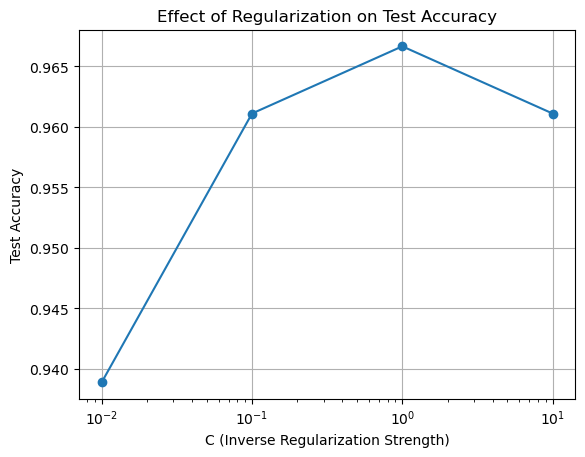


As C increases, regularization weakens. Very small C causes underfitting, while large C may slightly improve or overfit the data.

Test Accuracies Comparison:
Default (C=1, L2): 0.9667
Weak Regularization (C=1e6): 0.9361
No Regularization (penalty=None): 0.9667


C:\Users\kanav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\kanav\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



digits = load_digits()
print("Images shape:", digits.images.shape)
print("Data shape:", digits.data.shape)
print("Target shape:", digits.target.shape)

n_samples = len(digits.images)
X_manual = digits.images.reshape((n_samples, -1))  
print("Manual flattened shape:", X_manual.shape)
print("Does manual flattening match digits.data?", np.allclose(X_manual, digits.data))


fig, axes = plt.subplots(1, 6, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X_manual, digits.target, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nScaling is important because it helps gradient-based optimizers (like in logistic regression) "
      "converge faster and prevents features with large ranges from dominating the model.")


model_ovr = LogisticRegression(
    multi_class='ovr', max_iter=1000, random_state=42
)
model_ovr.fit(X_train_scaled, y_train)

train_acc = accuracy_score(y_train, model_ovr.predict(X_train_scaled))
test_acc = accuracy_score(y_test, model_ovr.predict(X_test_scaled))

print("\nTraining Accuracy:", round(train_acc, 4))
print("Testing Accuracy:", round(test_acc, 4))

sample_idx = 0
sample = X_test_scaled[sample_idx].reshape(1, -1)
probs = model_ovr.predict_proba(sample)
print("\nPredicted Probabilities:", np.round(probs, 3))

pred_class = np.argmax(probs)
true_label = y_test[sample_idx]
print("Predicted Class:", pred_class)
print("True Label:", true_label)

y_pred = model_ovr.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - Test Set")
plt.show()

cm_temp = cm.copy()
np.fill_diagonal(cm_temp, 0)  # remove correct predictions
confused_indices = np.dstack(np.unravel_index(np.argsort(cm_temp.ravel())[-3:], cm_temp.shape))[0]
print("\nTop 3 Most Confused Digit Pairs (true → predicted):")
for true, pred in confused_indices[::-1]:
    print(f"{true} → {pred} ({cm[true, pred]} times)")


C_values = [0.01, 0.1, 1, 10]
test_accuracies = []

for C in C_values:
    model = LogisticRegression(C=C, multi_class='ovr', max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    test_accuracies.append(acc)

plt.plot(C_values, test_accuracies, marker='o')
plt.xscale('log')
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Test Accuracy")
plt.title("Effect of Regularization on Test Accuracy")
plt.grid(True)
plt.show()

print("\nAs C increases, regularization weakens. Very small C causes underfitting, "
      "while large C may slightly improve or overfit the data.")


model_default = LogisticRegression(C=1, multi_class='ovr', max_iter=1000, random_state=42)
model_default.fit(X_train_scaled, y_train)
acc_default = accuracy_score(y_test, model_default.predict(X_test_scaled))

model_weak = LogisticRegression(C=1e6, multi_class='ovr', max_iter=1000, random_state=42)
model_weak.fit(X_train_scaled, y_train)
acc_weak = accuracy_score(y_test, model_weak.predict(X_test_scaled))

model_none = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000, random_state=42)
model_none.fit(X_train_scaled, y_train)
acc_none = accuracy_score(y_test, model_none.predict(X_test_scaled))

print("\nTest Accuracies Comparison:")
print(f"Default (C=1, L2): {acc_default:.4f}")
print(f"Weak Regularization (C=1e6): {acc_weak:.4f}")
print(f"No Regularization (penalty=None): {acc_none:.4f}")


In [6]:
import numpy as np

W = model_ovr.coef_
b = model_ovr.intercept_
x = X_test_scaled[sample_idx].reshape(-1, 1)
z = np.dot(W, x).reshape(-1) + b
p = 1 / (1 + np.exp(-z))
p_norm = p / np.sum(p)
p_sklearn = model_ovr.predict_proba(sample).reshape(-1)
comparison = np.vstack([p_norm, p_sklearn]).T

print("Raw Scores (z):", np.round(z, 3))
print("Sigmoid Probabilities:", np.round(p, 3))
print("Normalized Probabilities (manual OvR):", np.round(p_norm, 3))
print("Sklearn predict_proba output:", np.round(p_sklearn, 3))
print("\nManual vs Sklearn Probability Comparison:")
print("Class | Manual_OvR | Sklearn_proba")
for i, (manual, skl) in enumerate(zip(p_norm, p_sklearn)):
    print(f"{i:5d} | {manual:.4f}     | {skl:.4f}")
print("\nManual predicted class:", np.argmax(p_norm))
print("Sklearn predicted class:", np.argmax(p_sklearn))


Raw Scores (z): [ -8.253 -11.291 -12.611 -13.95   -9.671  -8.862   4.759  -9.032  -7.361
  -7.17 ]
Sigmoid Probabilities: [0.    0.    0.    0.    0.    0.    0.991 0.    0.001 0.001]
Normalized Probabilities (manual OvR): [0.    0.    0.    0.    0.    0.    0.998 0.    0.001 0.001]
Sklearn predict_proba output: [0.    0.    0.    0.    0.    0.    0.998 0.    0.001 0.001]

Manual vs Sklearn Probability Comparison:
Class | Manual_OvR | Sklearn_proba
    0 | 0.0003     | 0.0003
    1 | 0.0000     | 0.0000
    2 | 0.0000     | 0.0000
    3 | 0.0000     | 0.0000
    4 | 0.0001     | 0.0001
    5 | 0.0001     | 0.0001
    6 | 0.9980     | 0.9980
    7 | 0.0001     | 0.0001
    8 | 0.0006     | 0.0006
    9 | 0.0008     | 0.0008

Manual predicted class: 6
Sklearn predicted class: 6
